In [18]:
print("Pujitha")

Pujitha


In [19]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
import os
print("Current Dir: ",os.getcwd())
c=os.getcwd()
trainpath=os.path.join(c,"Datasets","Train")
testpath=os.path.join(c,"Datasets","Test")
validpath=os.path.join(c,"Datasets","Valid")

Current Dir:  c:\Users\pujit\OneDrive\Desktop\AICTE-intern\potato_leaf_disease


In [22]:
#importing all the images to trainset variable
trainset=tf.keras.utils.image_dataset_from_directory(
    trainpath,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [23]:
trainset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [24]:
validset=tf.keras.utils.image_dataset_from_directory(
    validpath,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [25]:
#for features
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


In [26]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
training_history = cnn.fit(x=trainset,validation_data=validset,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 604ms/step - accuracy: 0.3835 - loss: 1.2615 - val_accuracy: 0.5433 - val_loss: 0.9978
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 599ms/step - accuracy: 0.6736 - loss: 0.6982 - val_accuracy: 0.6400 - val_loss: 0.7346
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6905 - loss: 0.6873 - val_accuracy: 0.8000 - val_loss: 0.5199
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7800 - loss: 0.4560 - val_accuracy: 0.8333 - val_loss: 0.3543
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8475 - loss: 0.3622 - val_accuracy: 0.8467 - val_loss: 0.3403
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9087 - loss: 0.2310 - val_accuracy: 0.9100 - val_loss: 0.2354
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8728 - loss: 0.2938 - val_accuracy: 0.9167 - val_loss: 0.2002
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9358 - loss: 0.1908 - val_accuracy: 0.9400 - val

In [29]:
train_loss, train_acc = cnn.evaluate(trainset)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.9747 - loss: 0.0740
Training accuracy: 0.9777777791023254


In [30]:
val_loss, val_acc = cnn.evaluate(validset)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.9432 - loss: 0.1276
Validation accuracy: 0.9366666674613953


In [31]:
cnn.save('trained_plant_disease_model.keras')

In [32]:
training_history.history

{'accuracy': [0.4566666781902313,
  0.6944444179534912,
  0.7122222185134888,
  0.8100000023841858,
  0.8666666746139526,
  0.9244444370269775,
  0.8888888955116272,
  0.945555567741394,
  0.9399999976158142,
  0.9555555582046509],
 'loss': [1.0780528783798218,
  0.6408008337020874,
  0.6349442601203918,
  0.4046679139137268,
  0.34998613595962524,
  0.189212828874588,
  0.2587878108024597,
  0.16529972851276398,
  0.1436065286397934,
  0.12676461040973663],
 'val_accuracy': [0.5433333516120911,
  0.6399999856948853,
  0.800000011920929,
  0.8333333134651184,
  0.846666693687439,
  0.9100000262260437,
  0.9166666865348816,
  0.9399999976158142,
  0.9200000166893005,
  0.9366666674613953],
 'val_loss': [0.9978020191192627,
  0.7346317172050476,
  0.5199106931686401,
  0.3542519211769104,
  0.34034204483032227,
  0.23544102907180786,
  0.20020385086536407,
  0.1676071733236313,
  0.17606566846370697,
  0.15095840394496918]}

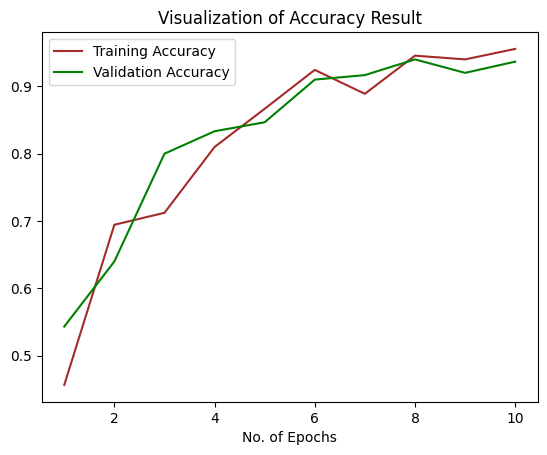

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()